In [23]:
using CSV, DataFrames, Statistics, OnlineStats, StatsBase, Plots, Distributions, StatsPlots, GLM, MLBase

In [24]:
df = CSV.read("hprice2.csv", DataFrame);

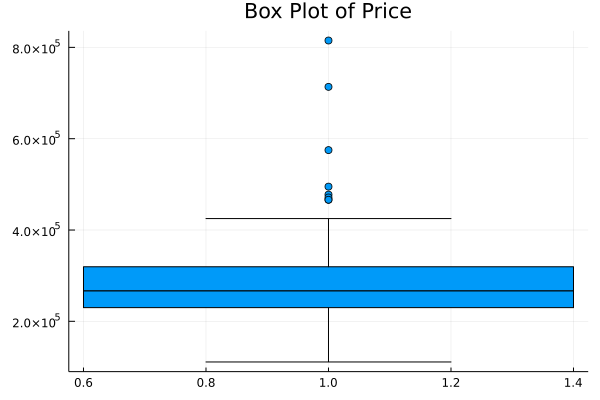

In [25]:
boxplot(df.price, title = "Box Plot of Price", legend = false)

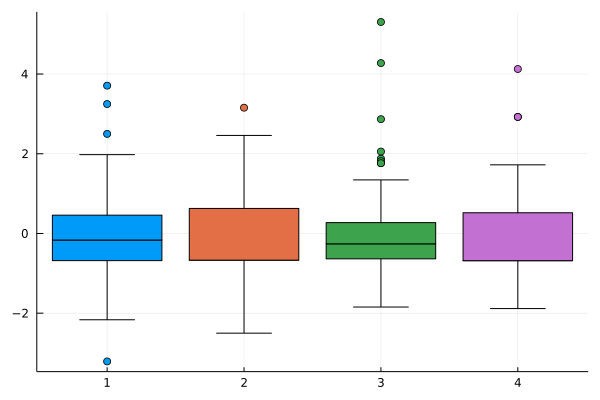

In [39]:
df[:, :log_price]    = log.(df[:, :price]);
df[:, :log_bdrms]    = log.(df[:, :bdrms]);
df[!, :price_dm]     = (df[:, :price] .- mean(df[:, :price]))/std(df[:, :price]);
df[!, :bdrms_dm] = (df[:, :bdrms] .- mean(df[:, :bdrms]))/std(df[:, :bdrms]);
df[!, :log_price_dm] = (df[:, :log_price] .- mean(df[:, :log_price]))/std(df[:, :log_price]);
df[!, :log_bdrms_dm] = (df[:, :log_bdrms] .- mean(df[:, :log_bdrms]))/std(df[:, :log_bdrms]);

boxplot([df.log_price_dm, df.log_bdrms_dm, df.price_dm, df.bdrms_dm], legend = false)

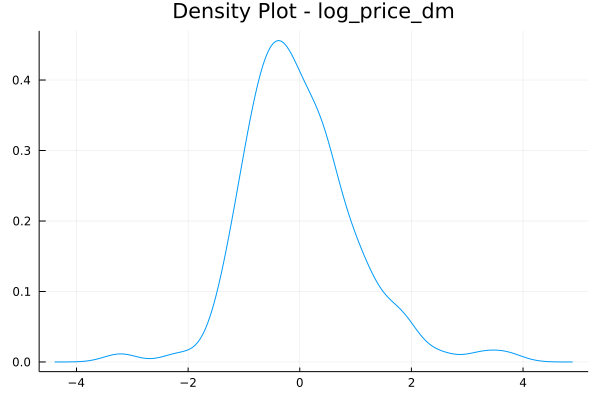

In [41]:
density(df.log_price_dm , title = "Density Plot - log_price_dm", legend = false)

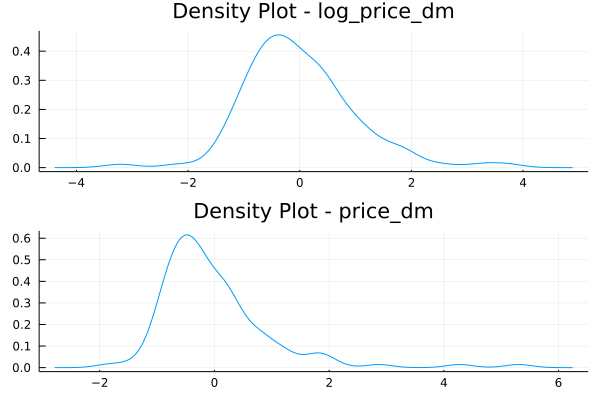

In [27]:
p1 = density(df.log_price_dm , title = "Density Plot - log_price_dm", legend = false)
p2 = density(df.price_dm , title = "Density Plot - price_dm", legend = false)

plot(p1, p2, layout = (2, 1), legend = false)

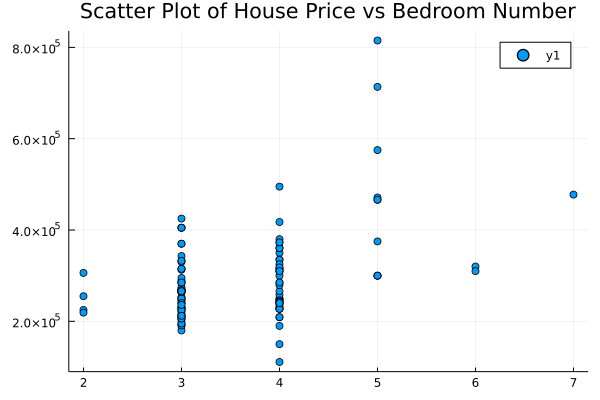

In [6]:
plot(df[:,:bdrms], df[:,:price], seriestype = :scatter, title = "Scatter Plot of House Price vs Bedroom Number")

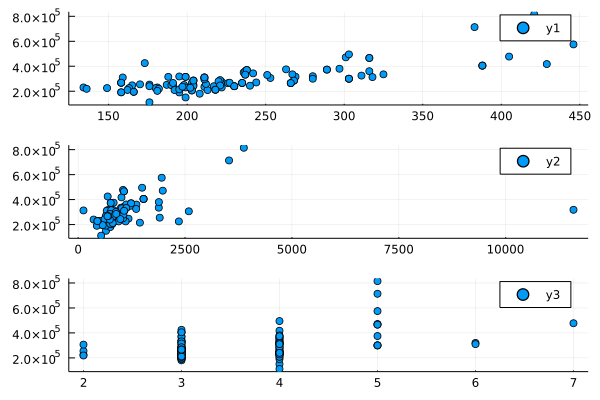

In [7]:
price = df[:,:price]
x     = Matrix(df[:,[:sqrmtr, :lotsize, :bdrms]])

plot(x, price, seriestype = :scatter, layout = (3, 1))

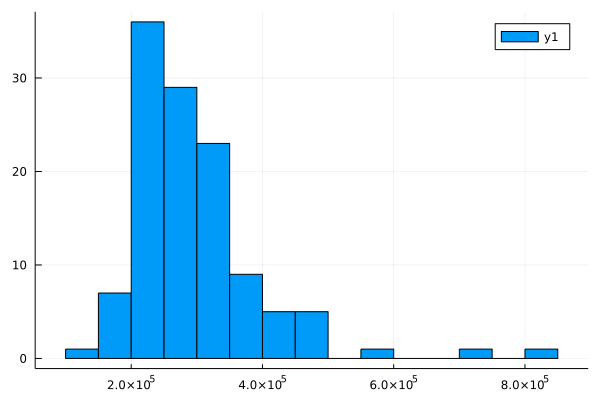

In [8]:
histogram(df[:,:price])

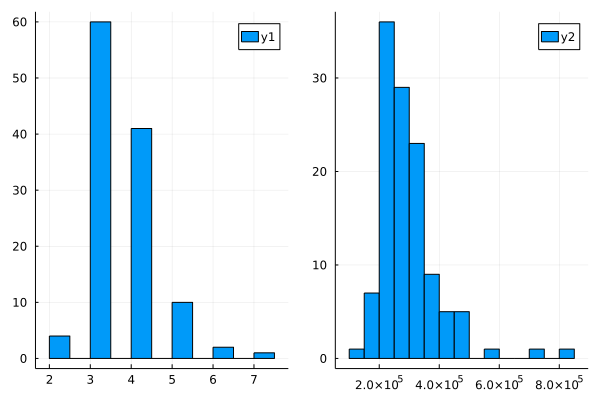

In [9]:
histogram(Matrix(df[:,[:bdrms, :price]]), layout = (1, 2))

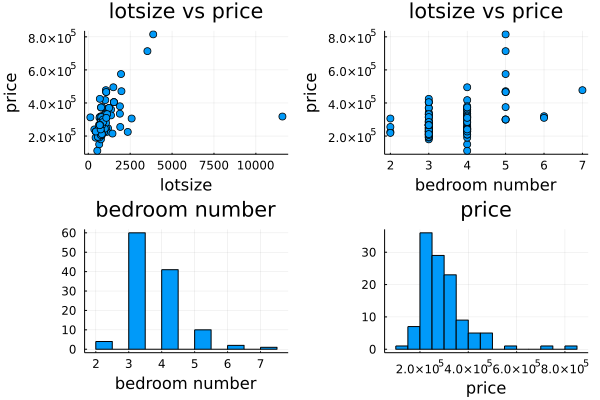

In [10]:
p1 = scatter(df[:,:lotsize], df[:,:price], xlabel = "lotsize", ylabel = "price", title = "lotsize vs price")
p2 = scatter(df[:,:bdrms], df[:,:price], xlabel = "bedroom number", ylabel = "price", title = "lotsize vs price")
p3 = histogram(df[:,:bdrms], xlabel = "bedroom number", title = "bedroom number")
p4 = histogram(df[:,:price], xlabel = "price", title = "price")

plot(p1, p2, p3, p4, layout = (2, 2), legend = false)

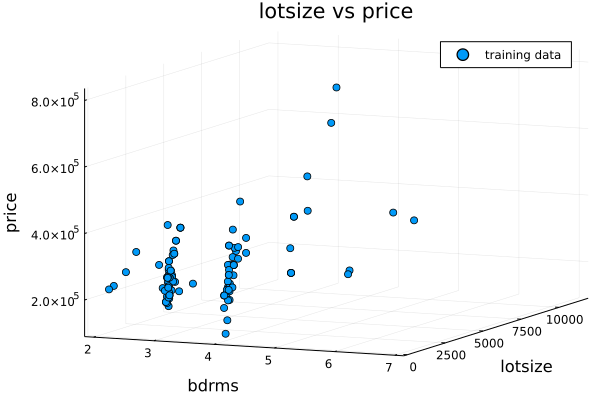

In [11]:
scatter(df[:,:bdrms], df[:,:lotsize], df[:,:price], xlabel = "bdrms", ylabel = "lotsize", zlabel="price", title = "lotsize vs price", label="training data")

In [12]:
fm = @formula(price ~ bdrms + lotsize)
linearRegressor = lm(fm, df)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

price ~ 1 + bdrms + lotsize

Coefficients:
──────────────────────────────────────────────────────────────────────────────
                  Coef.   Std. Error     t  Pr(>|t|)  Lower 95%      Upper 95%
──────────────────────────────────────────────────────────────────────────────
(Intercept)  85371.0     33885.0      2.52    0.0131  18251.3        1.52491e5
bdrms        49865.3      9257.76     5.39    <1e-06  31527.4    68203.1
lotsize         27.7581      6.93458  4.00    0.0001     14.022     41.4942
──────────────────────────────────────────────────────────────────────────────

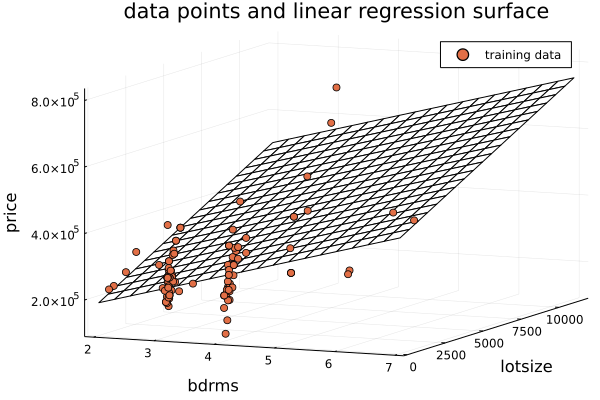

In [40]:
x=range(minimum(df.bdrms), maximum(df.bdrms), length=20)
y=range(minimum(df.lotsize), maximum(df.lotsize), length=20)

f(x,y) = coef(linearRegressor)[1] + coef(linearRegressor)[2] .* x + coef(linearRegressor)[3] .* y

Plots.gr()
wireframe(x,y,f, label="linear regression surface")

scatter!(df[:,:bdrms], df[:,:lotsize], df[:,:price], xlabel = "bdrms", ylabel = "lotsize", zlabel="price", title = "data points and linear regression surface", label="training data")

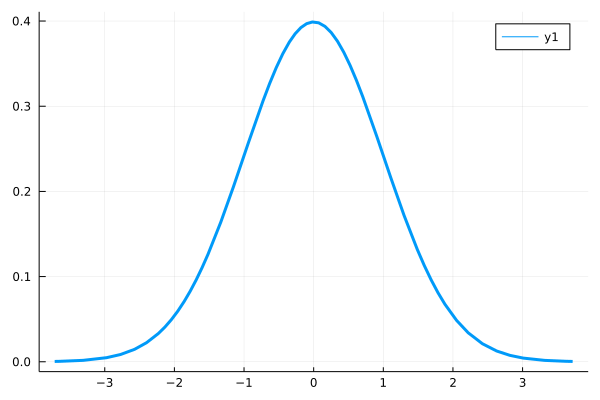

In [14]:
plot(Normal(0, 1), lw = 3)

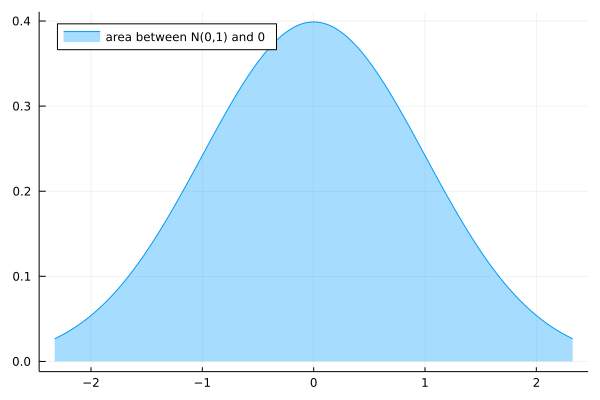

In [15]:
d      = Normal(0, 1)
lo, hi = quantile.(d, [0.01, 0.99])
x      = range(lo, hi; length = 100)

plot(x, pdf.(d, x), fillrange = 0, fillalpha = 0.35, c = 1, label = "area between N(0,1) and 0", legend = :topleft)

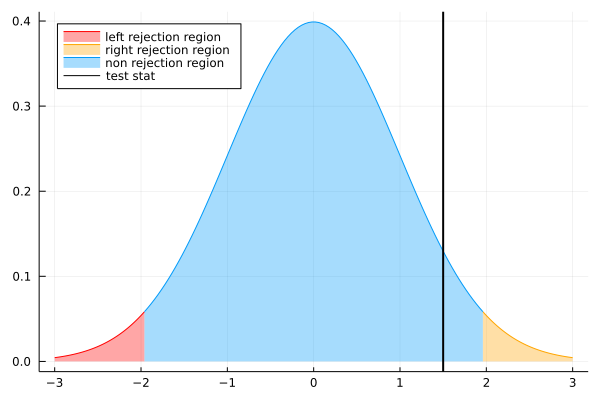

In [16]:
plot(range(-3, -1.96; length = 100), pdf.(d, range(-3, -1.96; length = 100)), fillrange = 0, fillalpha = 0.35, c = "red", label = "left rejection region", legend = :topleft)
plot!(range(1.96, 3; length = 100), pdf.(d, range(1.96, 3; length = 100)), fillrange = 0, fillalpha = 0.35, c = "orange", label = "right rejection region", legend = :topleft)
plot!(range(-1.96, 1.96; length = 100), pdf.(d, range(-1.96, 1.96; length = 100)), fillrange = 0, fillalpha = 0.35, c = 1, label = "non rejection region", legend = :topleft)
plot!([1.5], seriestype = :vline, c="black", linewidth=2, label="test stat")